In [27]:
import astropy.units as u
import numpy as np
from fil_finder import FilFinder2D
from astropy.io import fits

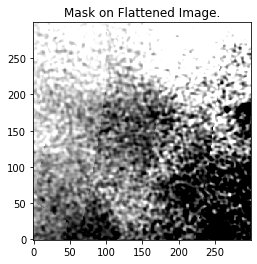

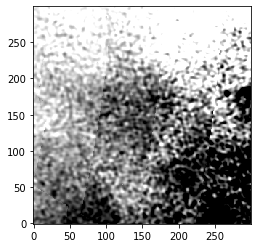

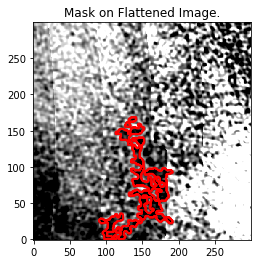

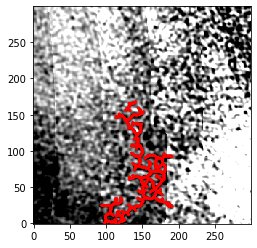

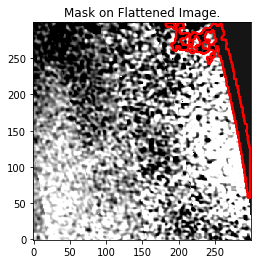

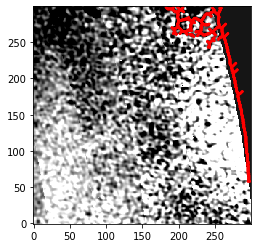

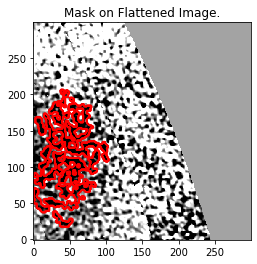

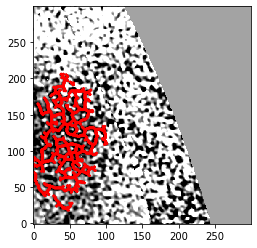

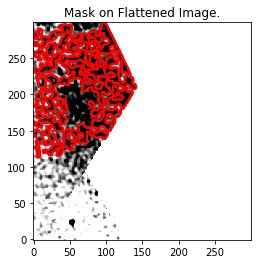

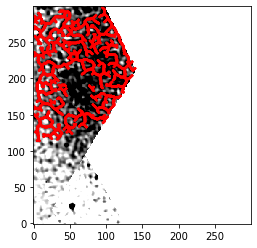

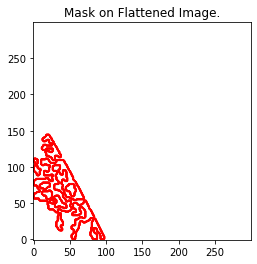

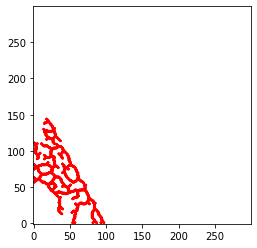

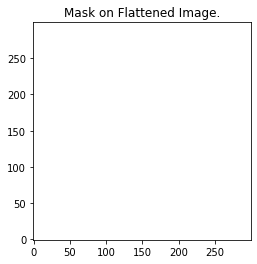

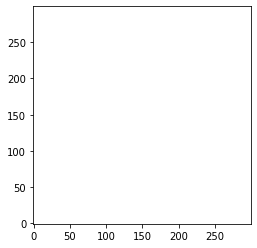

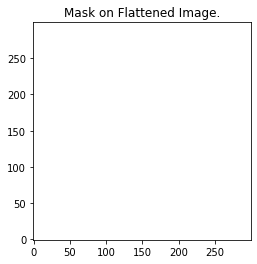

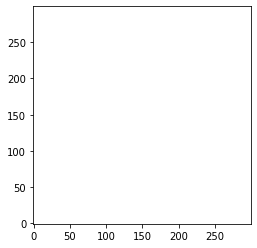

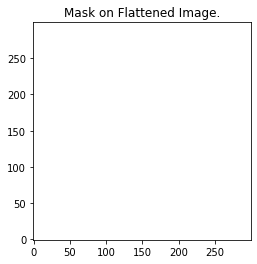

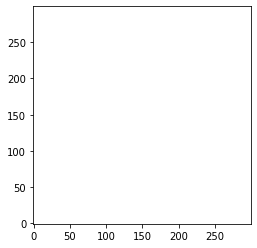

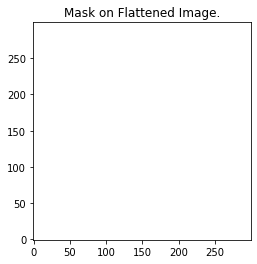

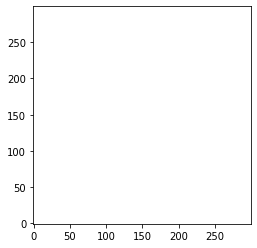

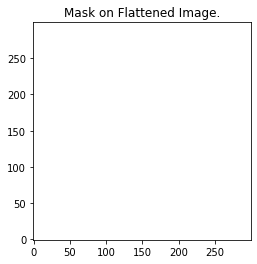

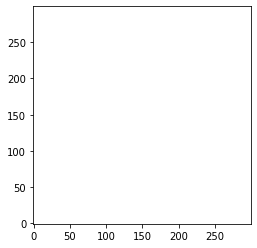

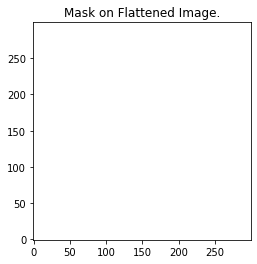

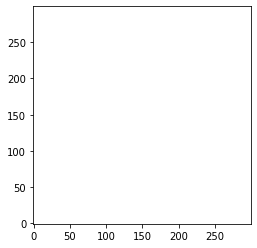

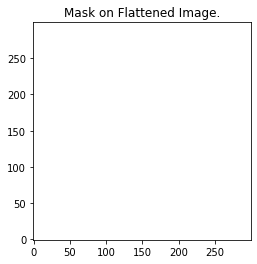

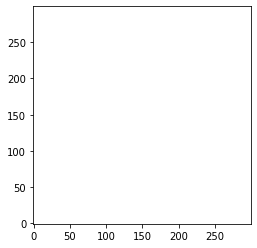

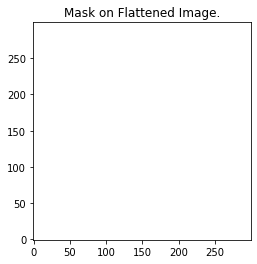

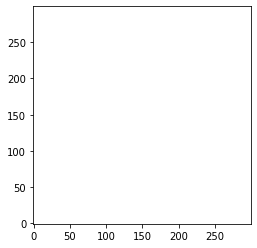

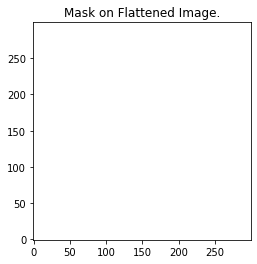

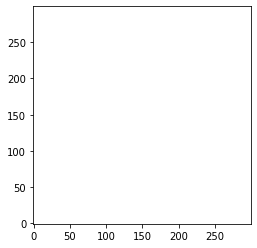

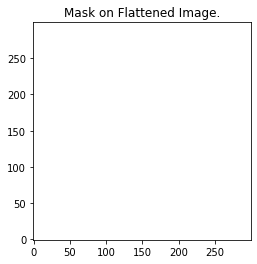

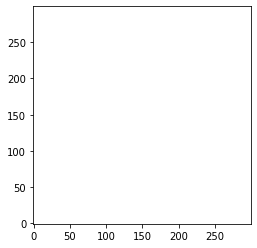

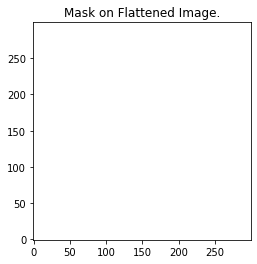

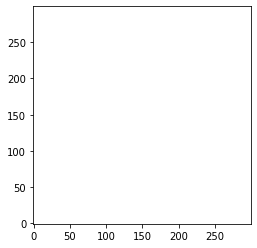

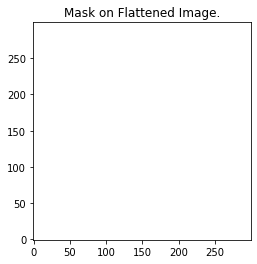

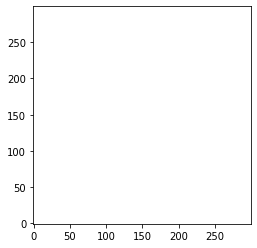

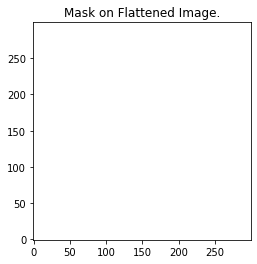

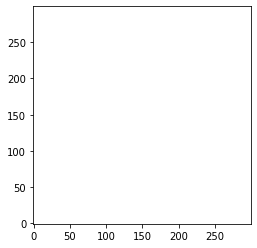

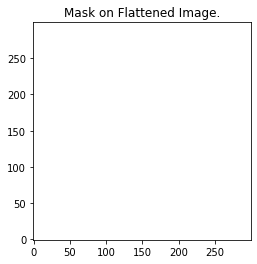

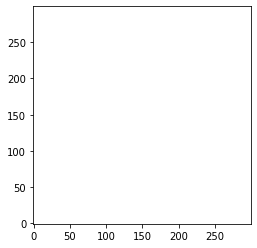

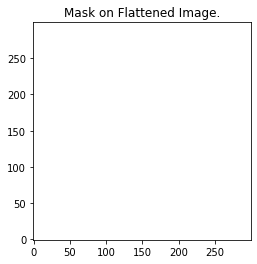

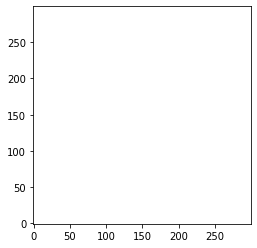

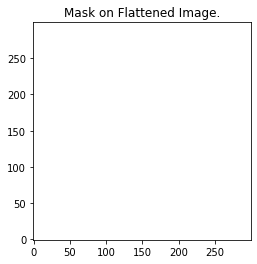

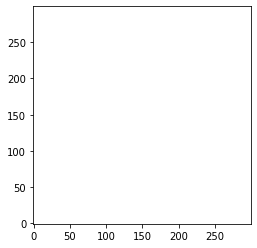

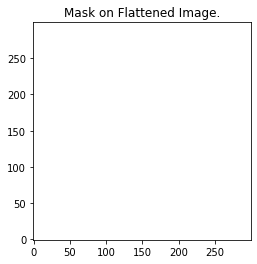

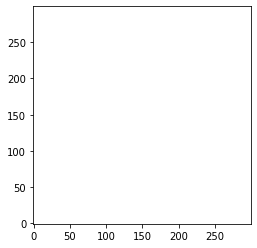

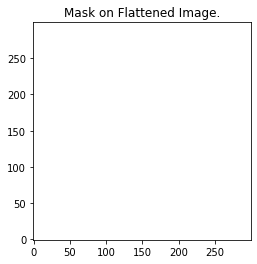

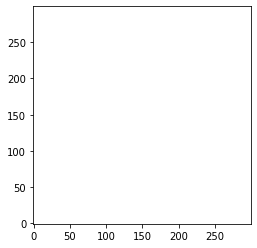

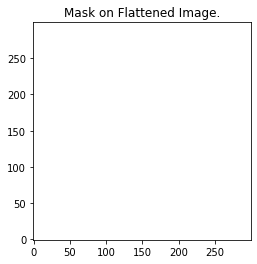

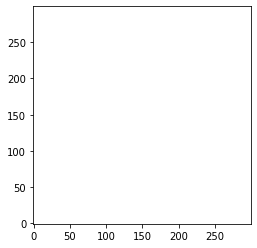

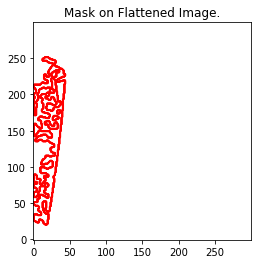

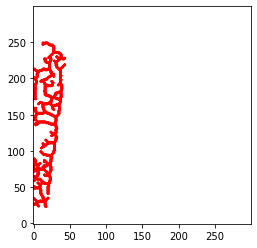

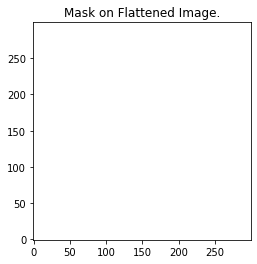

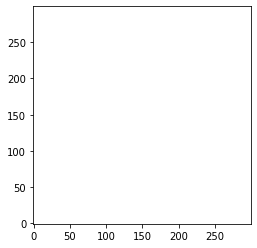

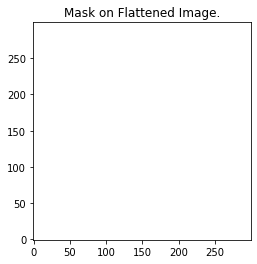

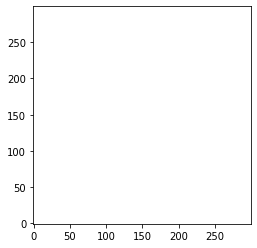

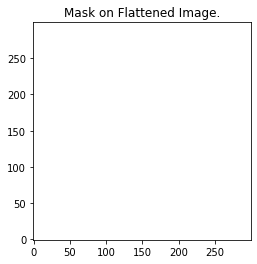

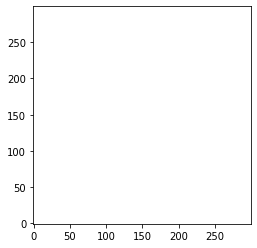

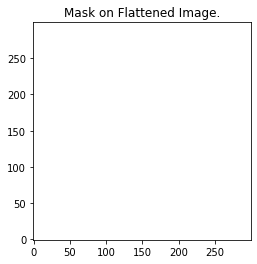

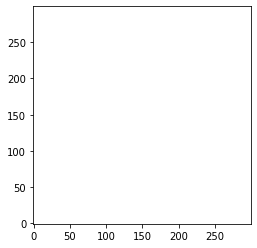

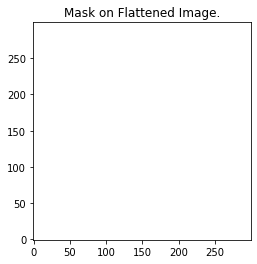

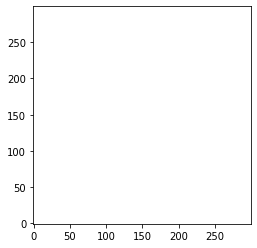

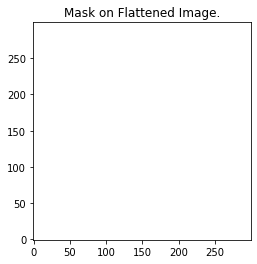

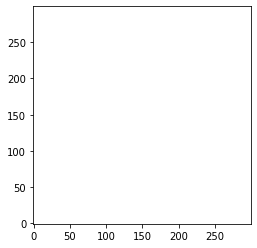

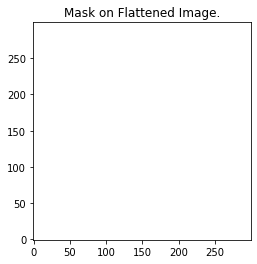

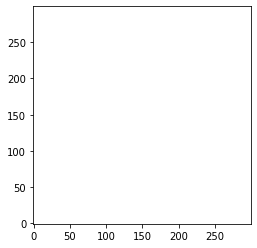

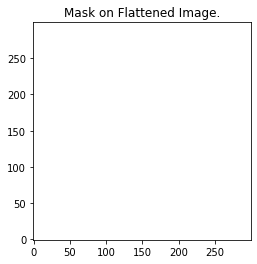

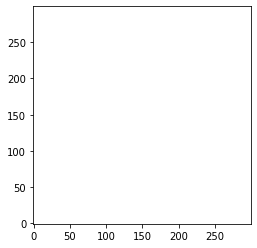

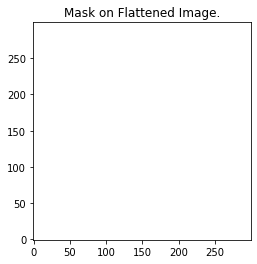

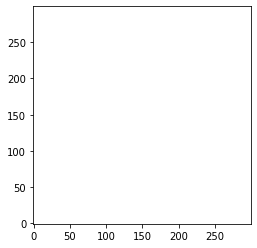

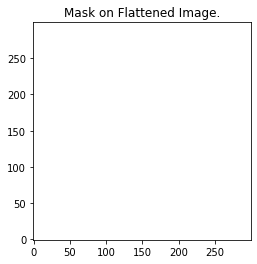

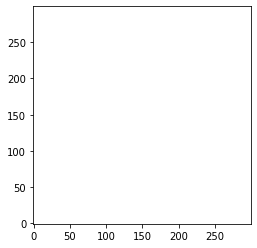

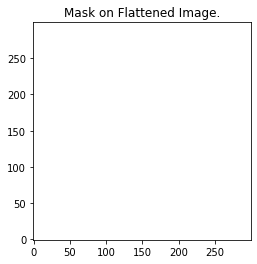

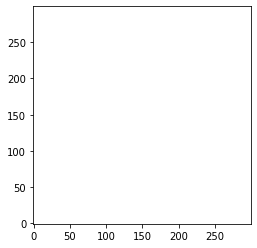

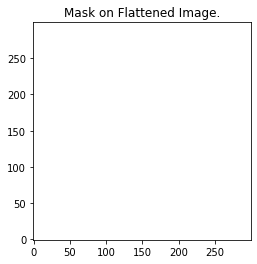

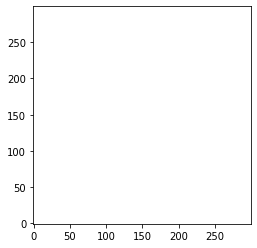

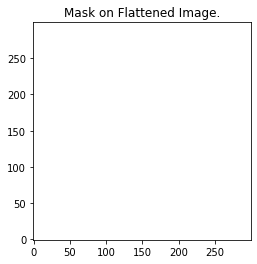

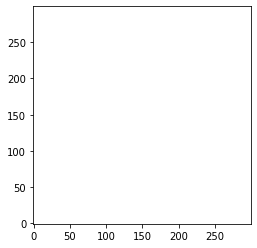

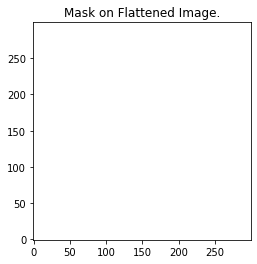

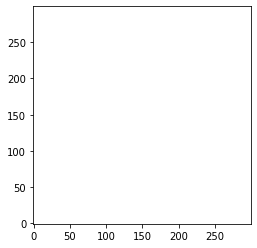

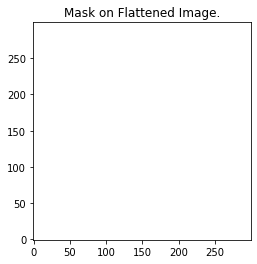

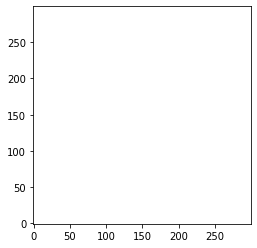

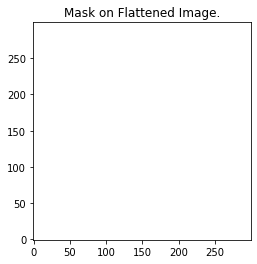

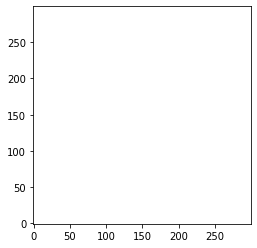

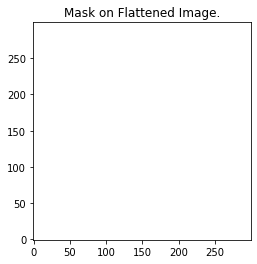

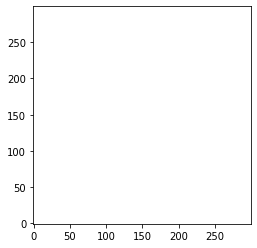

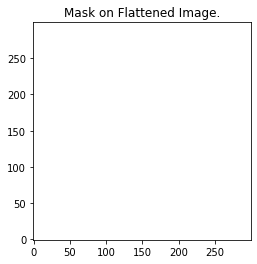

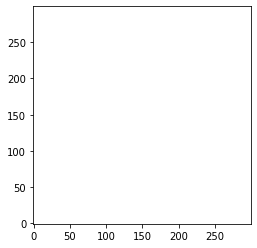

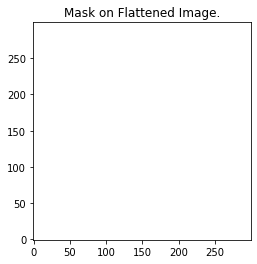

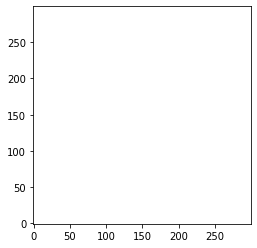

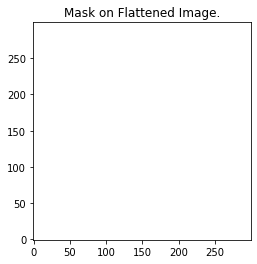

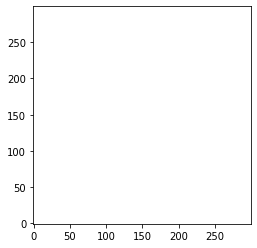

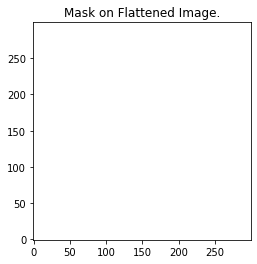

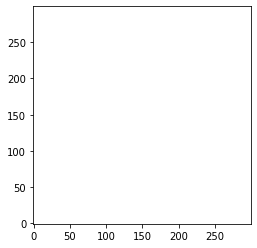

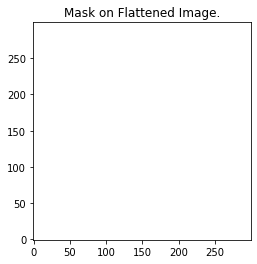

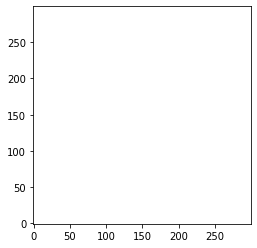

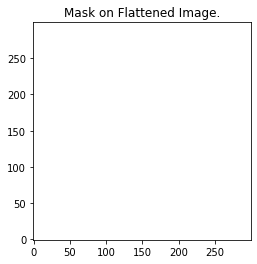

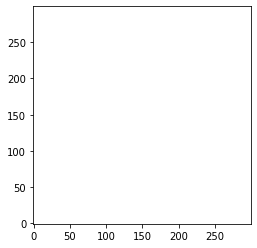

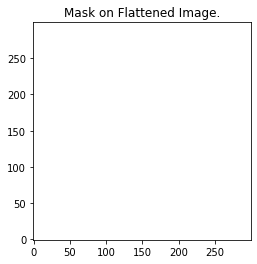

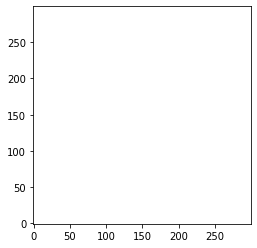

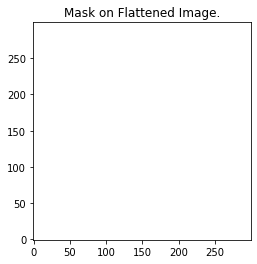

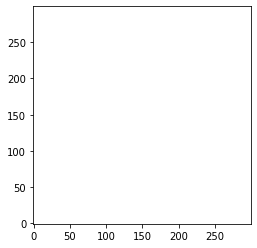

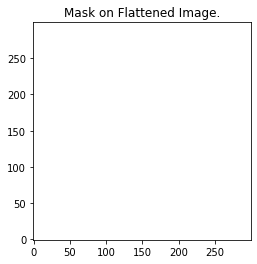

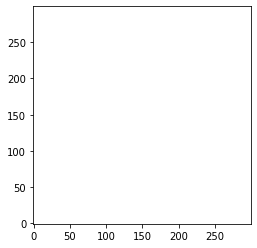

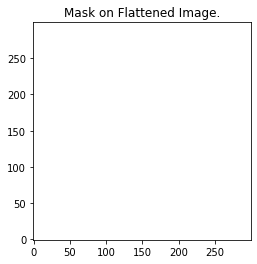

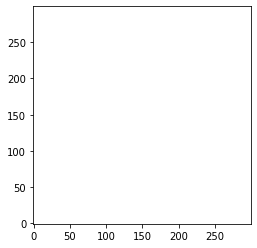

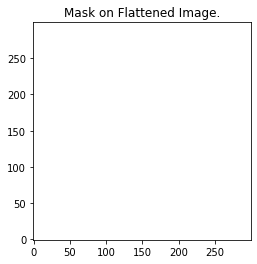

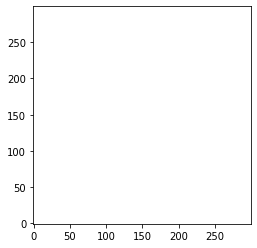

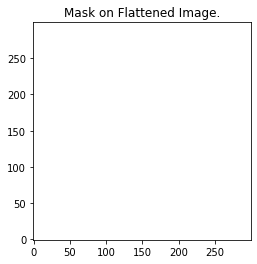

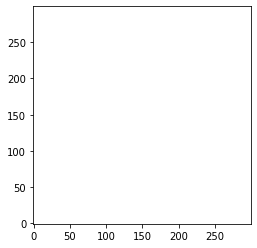

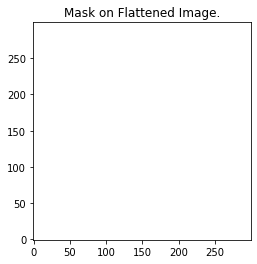

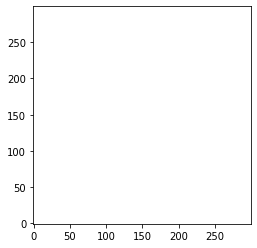

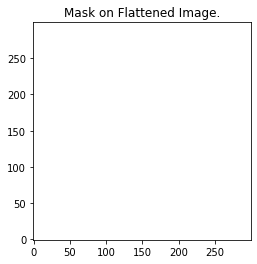

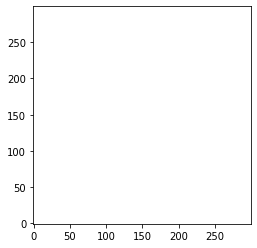

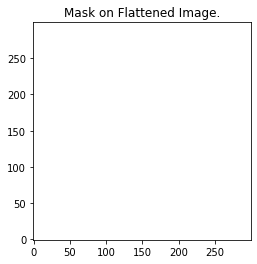

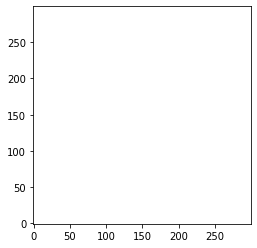

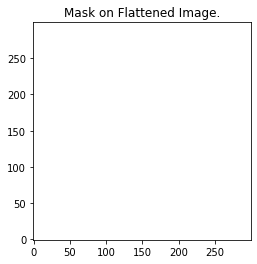

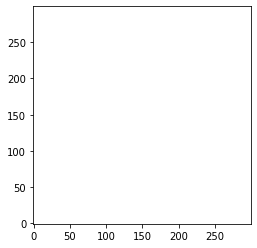

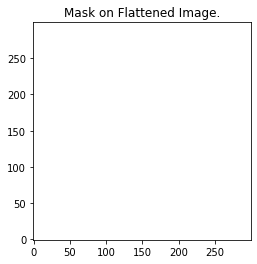

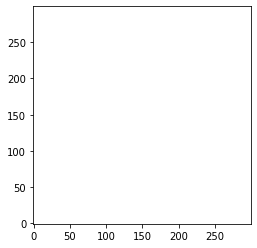

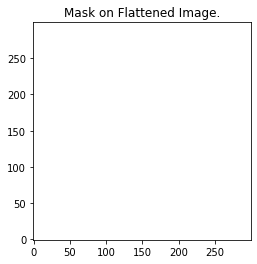

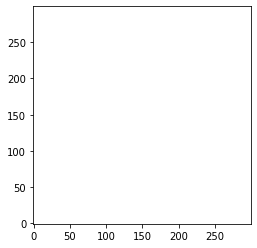

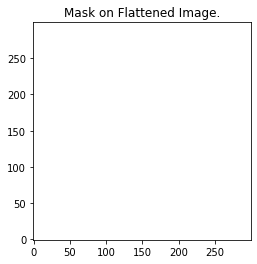

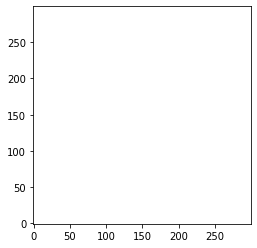

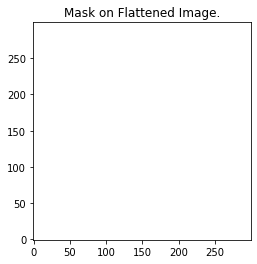

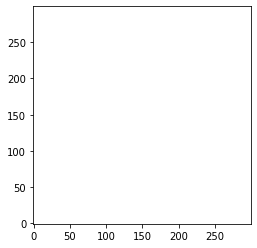

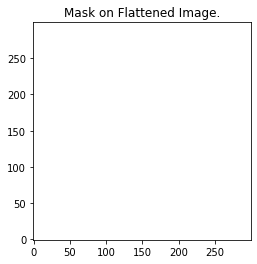

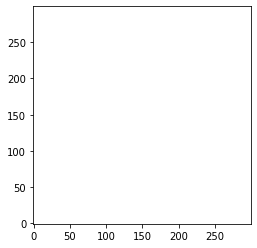

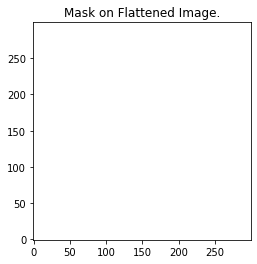

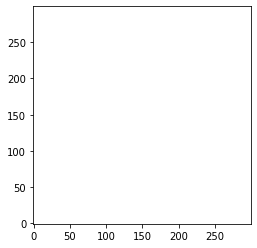

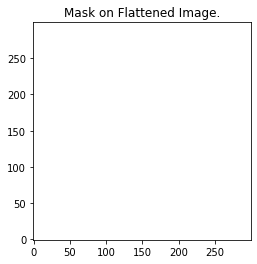

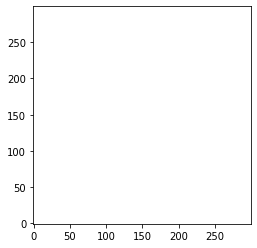

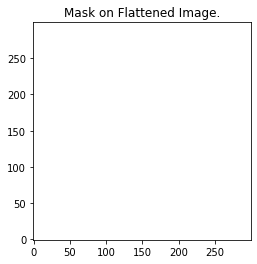

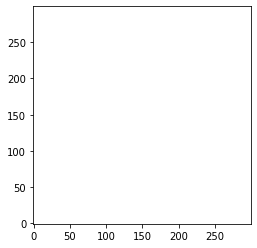

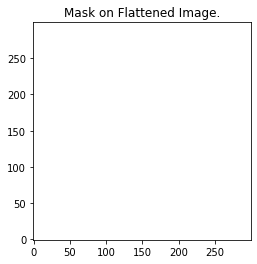

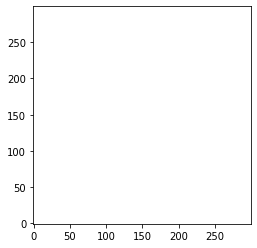

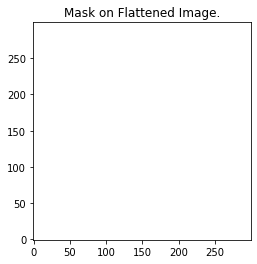

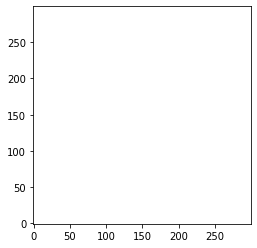

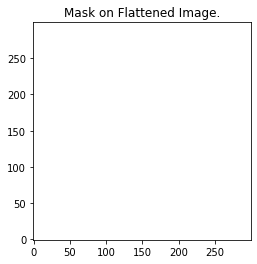

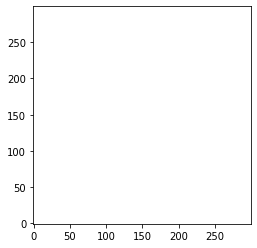

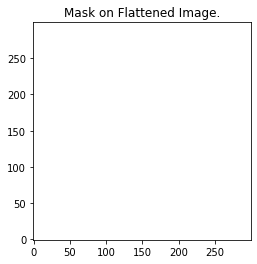

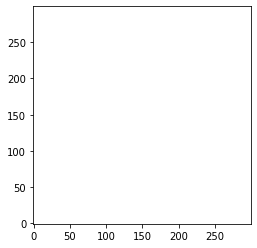

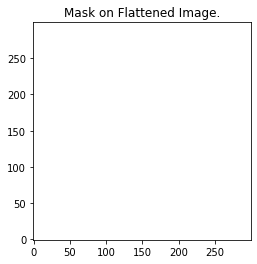

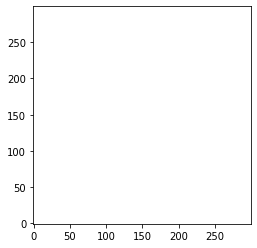

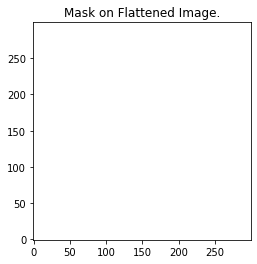

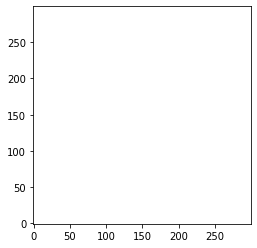

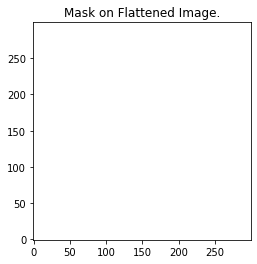

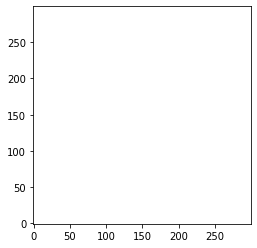

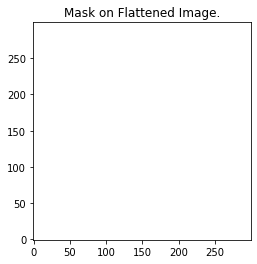

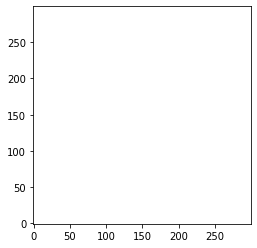

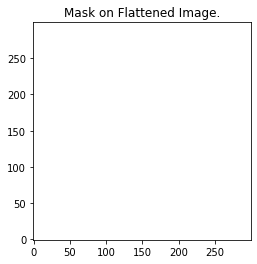

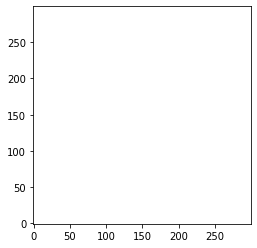

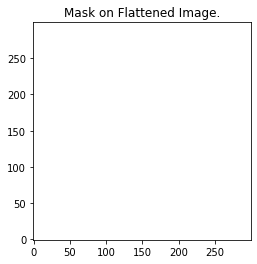

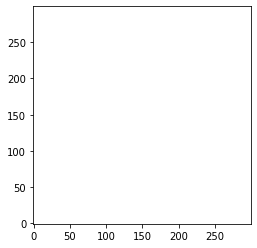

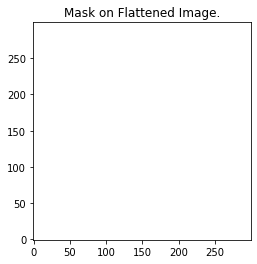

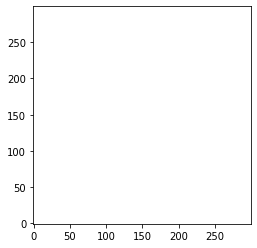

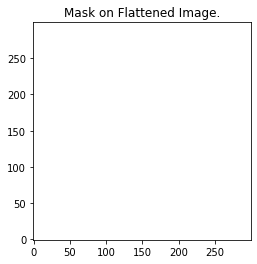

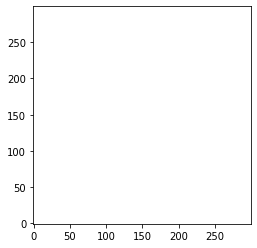

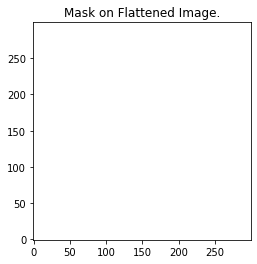

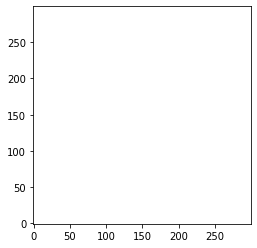

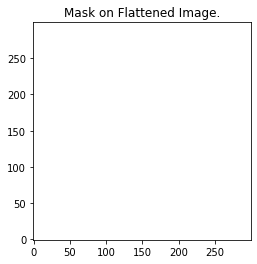

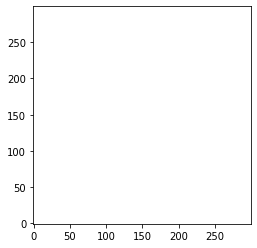

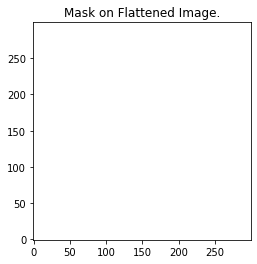

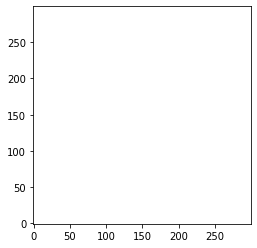

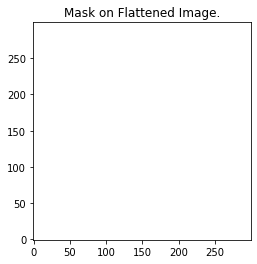

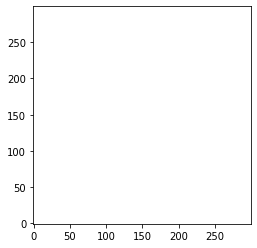

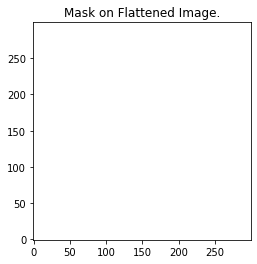

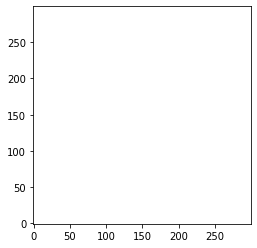

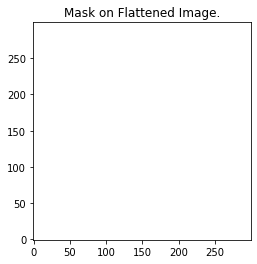

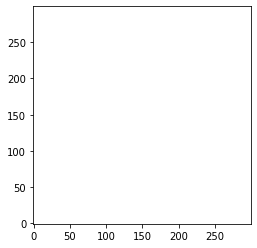

In [32]:
i = 0
while i < 625:
    hdu = fits.open(r'C:\Users\shari\Documents\YR 4 Project\My work\Images\cut{}.fits'.format(i), ignore_missing_end=True)[0]
    fil = FilFinder2D(hdu, distance= 8000*u.pc, beamwidth=2.222222*10**(-3)*u.deg)

    std = np.std(hdu.data)
    av = np.mean(hdu.data)

    fil.preprocess_image(flatten_percent=100)
    fil.create_mask(verbose=True, border_masking=False, size_thresh = 10*u.pc**2, glob_thresh = av+0.5*std, adapt_thresh = 0.5*u.pc)
    fil.medskel(verbose=True)
    fil.analyze_skeletons(skel_thresh = 300*u.pix)

    if len(fil.filaments) > 0:
        hdulist = fits.HDUList([hdu])
        hdulist.writeto(r'C:\Users\shari\Documents\YR 4 Project\My work\Filaments\cut{}.fits'.format(i), overwrite=True)
    i+=1